The [reverse probability page](first_bayes) has a game, that we analyzed by simulation, and then by reflection.

The game is:

* I have two boxes; *box4* with 4 red balls and 1 green ball, and *box2* with
  two red balls and three green balls.
* I offer you one of these two boxes at random, without telling you which.
* You draw a ball at random from the box, and you get a red ball.
* What is the probability that I gave you box4?

We found by simulation, and later by reflection, that the probability is 0.67.

The logic we discovered was:

* We want the proportion of "red" trials that came from box4.
* Calculate the proportion of trials that are *both* box4 and red, and divide
  by the overall proportion of red trials.
* The proportion of red trials that are *both* box4 *and* red is the
  proportion of box4 trials multiplied by (the proportion of box4 trials that
  are red).

This is another way to express that logic, using the height of bars to express
the probabilities.

First we express the initial probabilities of getting box4 and box2:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

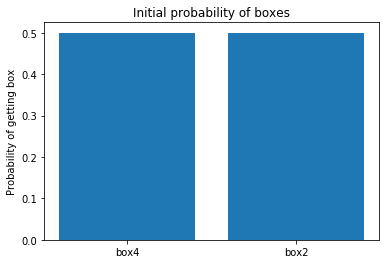

In [2]:
box_probabilities = np.array([0.5, 0.5])
x_locations = [0, 1]
box_labels = ['box4', 'box2']
plt.bar(x_locations, box_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting box")
plt.title('Initial probability of boxes');

Next we express the initial probabilities of getting a red ball from box4 and from box2:

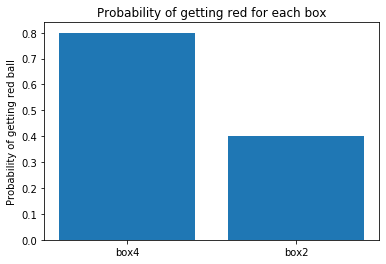

In [3]:
red_probabilities = np.array([0.8, 0.4])
plt.bar(x_locations, red_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball")
plt.title('Probability of getting red for each box');

Next we combine the two steps, of getting a box, and then drawing a ball.

There is a 0.5 probability of box4 and a 0.8 probability of a red ball, given we have box4, so the probability of box4 *and* a red ball is 0.5 (for box4) * 0.8 (for red given box4) = 0.4.

Similarly, the probability of box2 *and* a red ball is 0.5 (for box2) * 0.4 (for red given box2) = 0.2.

We can think of this as multiplying the values expressed by heights in the first bar graph (0.5, and 0.5 in this case), by the values expressed by heights in the second bar graph (0.8 and 0.4 in this case).

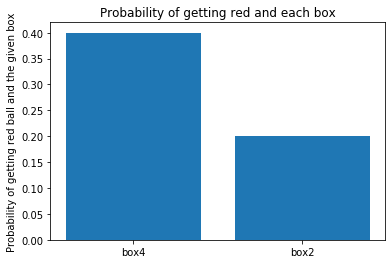

In [4]:
box_and_red_probs = box_probabilities * red_probabilities
plt.bar(x_locations, box_and_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball and the given box")
plt.title('Probability of getting red and each box');

In this case where the initial probabilities of the boxes are 0.5, this last bar graph is just the second bar graph scaled down by 0.5.

Lastly, remember we are interested in the probability that we started with box4, given we have a red ball.

To get this probability, we first take the probability of getting a red ball *and* box4.  This is the first bar on the graph above - 0.5 * 0.8 = 0.4.

Next we divide by the overall probability of getting a red ball, which is the sum of the heights of the two bars above - 0.4 + 0.2 = 0.6.

We can do this calculation by dividing the heights of the bars above by the sum of the heights, so the heights of the bars now sum to 1:

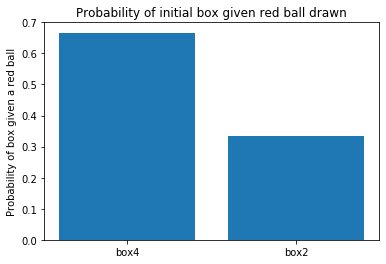

In [5]:
box_given_red_probs = box_and_red_probs / np.sum(box_and_red_probs)
plt.bar(x_locations, box_given_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of box given a red ball")
plt.title('Probability of initial box given red ball drawn');

The left bar is our familiar (0.5 * 0.8) / 0.6 value, from the [reverse probability page](first_bayes).  It is probability that we were given box4, given that we have drawn a red ball.  The second bar is the probability that we were given box2, given we have drawn a red ball.  Note that the height of the bars sums to 1.